In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wealth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df_V = pd.read_csv(r"C:\Users\Wealth\Downloads\twitter_validation.csv")

In [8]:
df = pd.read_csv(r"C:\Users\Wealth\Downloads\twitter_training (1).csv")

In [9]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [11]:
df.shape

(74681, 4)

In [12]:
df.index

RangeIndex(start=0, stop=74681, step=1)

In [13]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [15]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [16]:
df.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [17]:
df.columns = ['id', 'game', 'sentiment', 'text']
df_V.columns = ['id', 'game', 'sentiment', 'text']

In [18]:
id_types = df['id'].value_counts()
id_types

id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

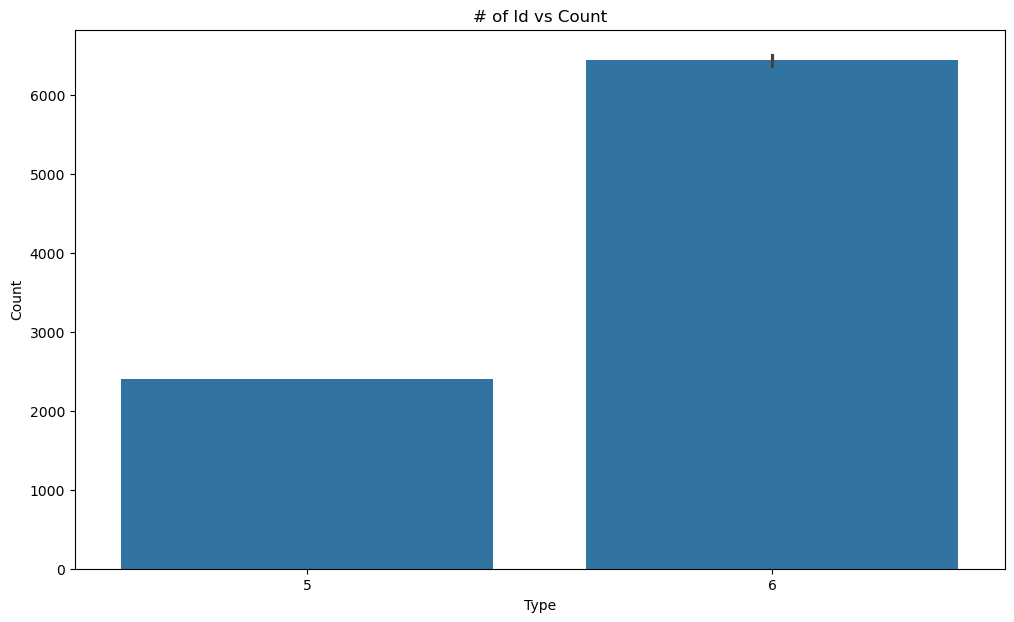

In [19]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [20]:
game_types = df['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

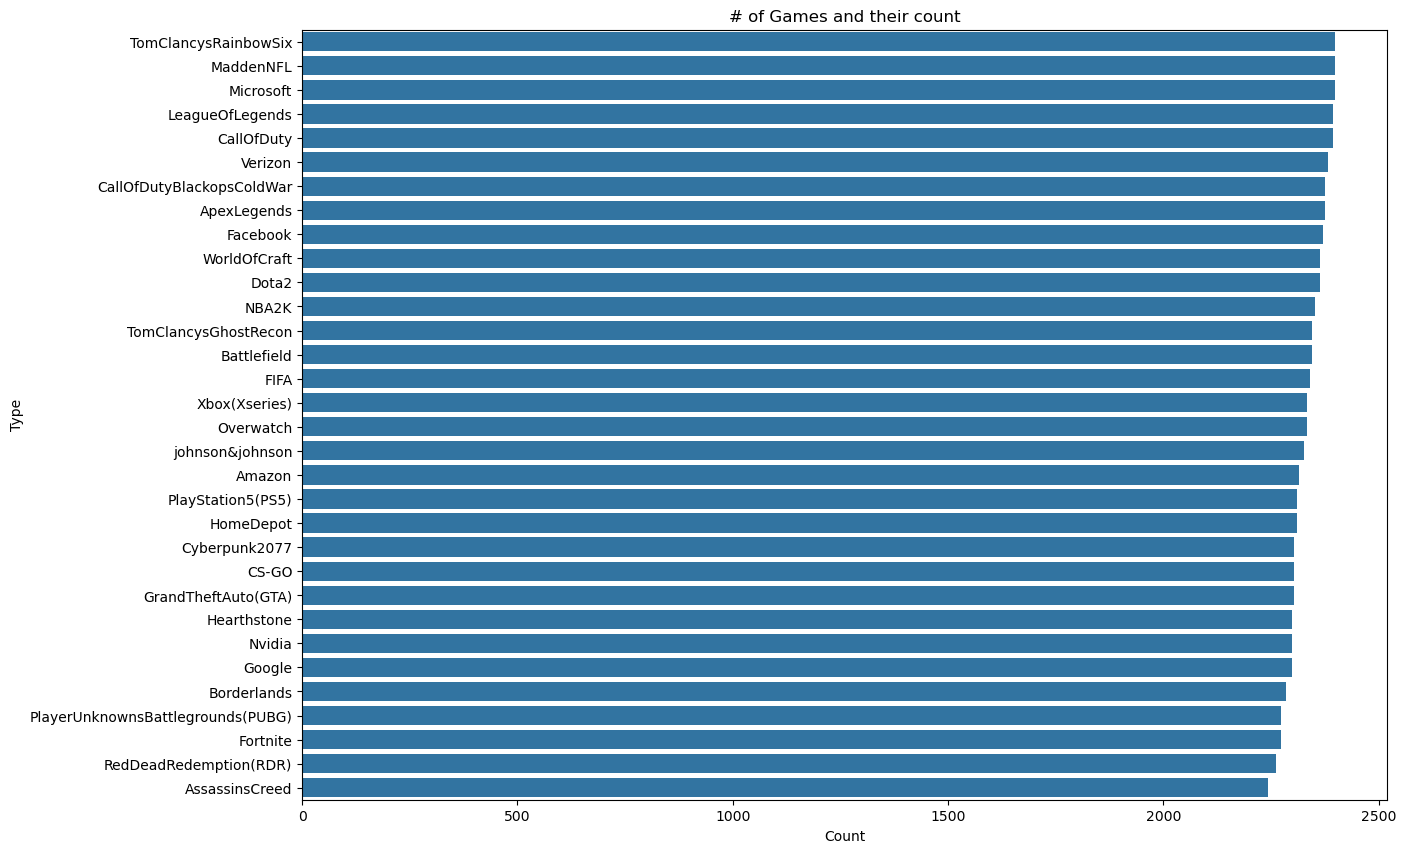

In [21]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

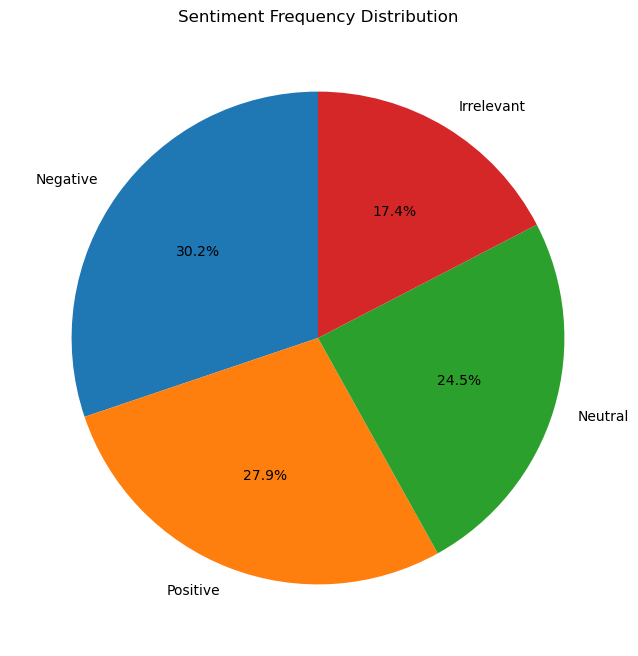

In [26]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Frequency Distribution')
plt.show()

In [27]:
total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
text,686,0.92
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [28]:
df.dropna(subset=['text'],inplace=True)

total_null=df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [29]:
train0=df[df['sentiment']=="Negative"]
train1=df[df['sentiment']=="Positive"]
train2=df[df['sentiment']=="Irrelevant"]
train3=df[df['sentiment']=="Neutral"]

In [30]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [31]:
df=pd.concat([train0,train1,train2,train3],axis=0)
df

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
74658,9197,Nvidia,Neutral,"Nvidia plans to release its 2017 ""Crypto Craze..."
74659,9197,Nvidia,Neutral,"Nvidia does not want to give up its ""cryptoins..."
74660,9197,Nvidia,Neutral,Nvidia doesn’t intend to give away its 2017 ad...
74661,9197,Nvidia,Neutral,Nvidia therefore doesn ’ t want to give up its...


In [32]:
id_types = df['id'].value_counts()
id_types

id
2405     6
6649     6
6619     6
6631     6
6632     6
        ..
6784     3
3268     3
13004    3
10250    3
12919    3
Name: count, Length: 12447, dtype: int64

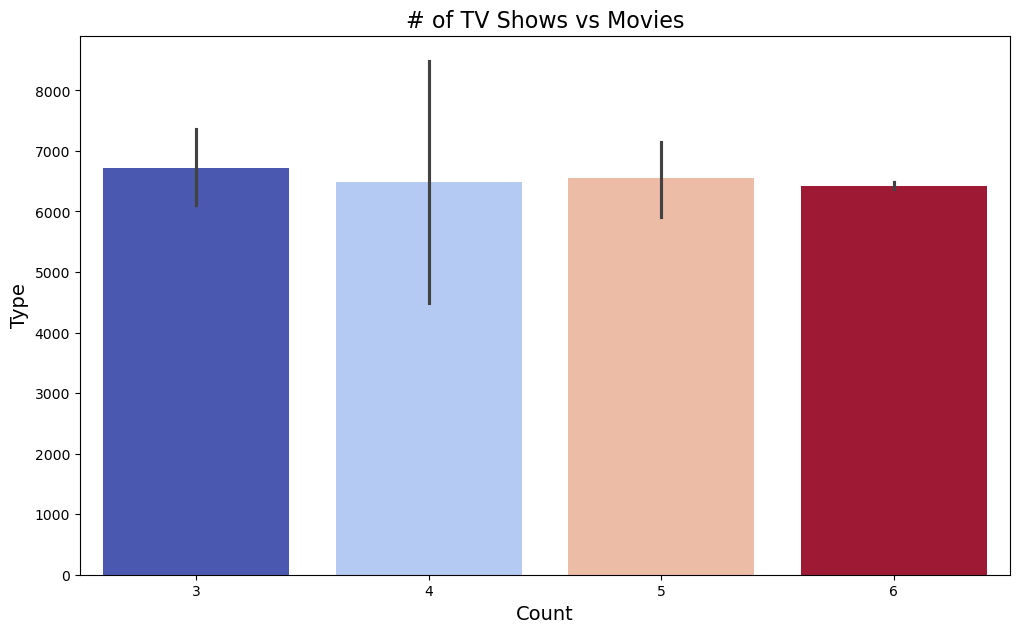

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=id_types.values, y=id_types.index, hue=id_types.values, palette="coolwarm", legend=False)

plt.xlabel('Count', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.title('# of TV Shows vs Movies', fontsize=16)
plt.show()

In [34]:
game_types = df['game'].value_counts()
game_types

game
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                  

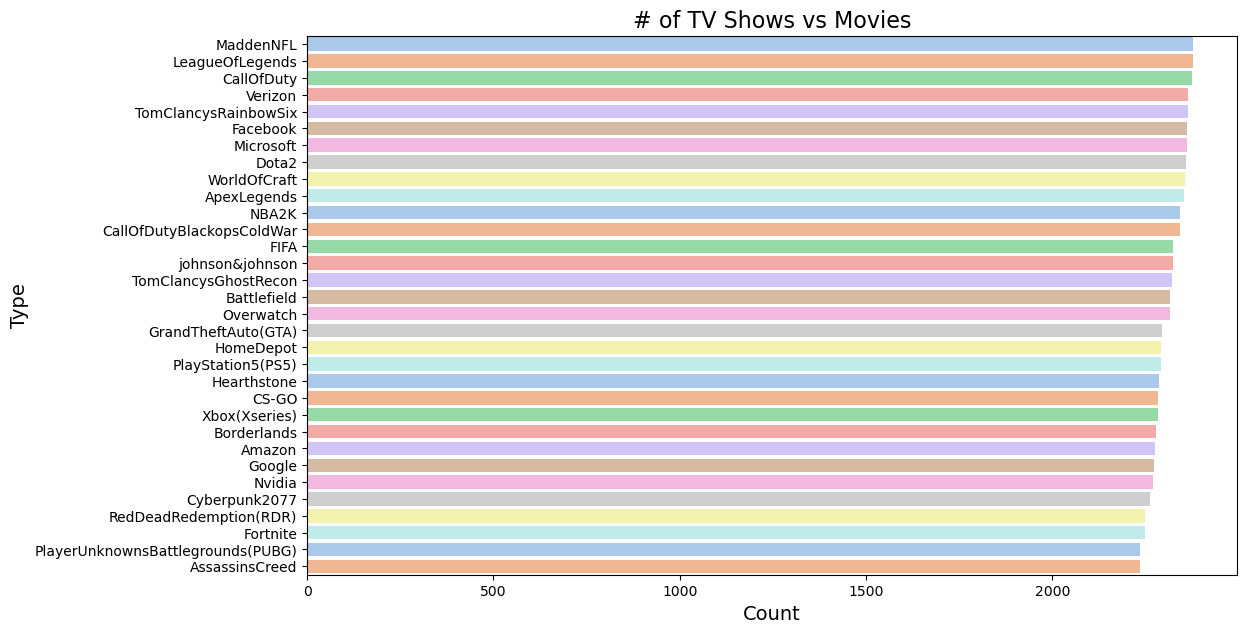

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=game_types.values, y=game_types.index, hue=game_types.index, palette="pastel", legend=False)

plt.xlabel('Count', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.title('# of TV Shows vs Movies', fontsize=16)
plt.show()

In [36]:
sentiment_types = df['sentiment'].value_counts()
sentiment_types

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

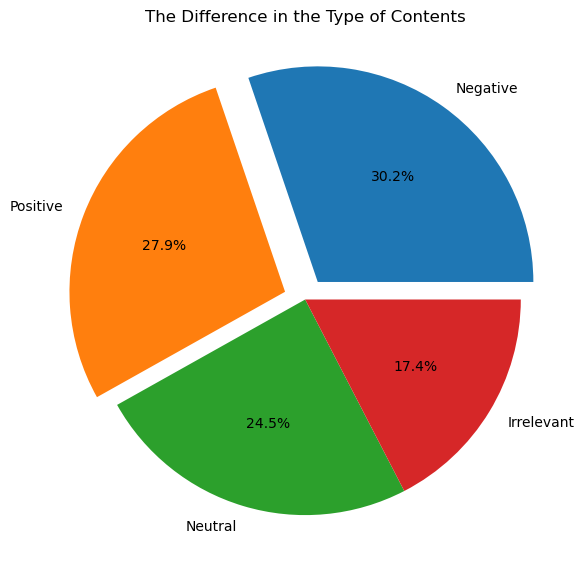

In [37]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [39]:
df['sentiment']=label_encoder.fit_transform(df['sentiment'])
df['game']=label_encoder.fit_transform(df['game'])
df_V['sentiment']=label_encoder.fit_transform(df_V['sentiment'])
df_V['game']=label_encoder.fit_transform(df_V['game'])

In [40]:
df = df.drop(['id'],axis=1)
df

,game,sentiment,text
23,4,1,the biggest dissappoinment in my life came out...
24,4,1,The biggest disappointment of my life came a y...
25,4,1,The biggest disappointment of my life came a y...
26,4,1,the biggest dissappoinment in my life coming o...
27,4,1,For the biggest male dissappoinment in my life...
...,...,...,...
74658,21,2,"Nvidia plans to release its 2017 ""Crypto Craze..."
74659,21,2,"Nvidia does not want to give up its ""cryptoins..."
74660,21,2,Nvidia doesn’t intend to give away its 2017 ad...
74661,21,2,Nvidia therefore doesn ’ t want to give up its...


In [41]:
df.nunique()

game            32
sentiment        4
text         69490
dtype: int64

In [42]:
df_V.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64